# A Stochastic Optimal Growth Model

## Contents

- [A Stochastic Optimal Growth Model](#A-Stochastic-Optimal-Growth-Model)  
  - [Overview](#Overview)  
  - [The Model](#The-Model)  
  - [Computation](#Computation)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

## Overview

In this lecture we're going to study a simple optimal growth model with one agent

The model is a version of the standard one sector infinite horizon growth model studied in

- [SLP89](https://lectures.quantecon.org/py/zreferences.html#stokeylucas1989), chapter 2  
- [LS12](https://lectures.quantecon.org/py/zreferences.html#ljungqvist2012), section 3.1  
- [EDTC](http://johnstachurski.net/edtc.html), chapter 1  
- [Sun96](https://lectures.quantecon.org/py/zreferences.html#sundaram1996), chapter 12  


The technique we use to solve the model is dynamic programming

Our treatment of dynamic programming follows on from earlier
treatments in our lectures on [shortest paths](https://lectures.quantecon.org/py/short_path.html) and
[job search](https://lectures.quantecon.org/py/mccall_model.html)

We'll discuss some of the technical details of dynamic programming as we
go along

## The Model

<a id='index-1'></a>
Consider an agent who owns an amount $ y_t \in \mathbb R_+ := [0, \infty) $ of a consumption good at time $ t $

This output can either be consumed or invested

When the good is invested it is transformed one-for-one into capital

The resulting capital stock, denoted here by $ k_{t+1} $, will then be used for production

Production is stochastic, in that it also depends on a shock $ \xi_{t+1} $ realized at the end of the current period

Next period output is

$$
y_{t+1} := f(k_{t+1}) \xi_{t+1}
$$

where $ f \colon \mathbb R_+ \to \mathbb R_+ $ is called the production function

The resource constraint is

$$
    k_{t+1} + c_t \leq y_t
$$

and all variables are required to be nonnegative

### Assumptions and Comments

In what follows,

- The sequence $ \{\xi_t\} $ is assumed to be IID  
- The common distribution of each $ \xi_t $ will be denoted $ \phi $  
- The production function $ f $ is assumed to be increasing and continuous  
- Depreciation of capital is not made explicit but can be incorporated into the production function  


While there are many other treatments of the stochastic growth model that use $ k_t $ as the state variable, we will use $ y_t $

This will allow us to treat a stochastic model while maintaining only one state variable

We consider alternative states and timing specifications in some of our other lectures

### Optimization

Taking $ y_0 $ as given, the agent wishes to maximize


$$
\mathbb E \left[ \sum_{t = 0}^{\infty} \beta^t u(c_t) \right]
$$

subject to


$$
y_{t+1} = f(y_t - c_t) \xi_{t+1}
\quad \text{and} \quad
0 \leq c_t \leq y_t
\quad \text{for all } t
$$

where

- $ u $ is a bounded, continuous and strictly increasing utility function and  
- $ \beta \in (0, 1) $ is a discount factor  


In $y_t$'s transition equation, we are assuming that the resource constraint holds with equality --- which is reasonable because $ u $ is strictly increasing and no output will be wasted at the optimum

In summary, the agent's aim is to select a path $ c_0, c_1, c_2, \ldots $ for consumption that is

1. nonnegative,  
1. feasible in the sense of the resource constraint,  
1. optimal, in the sense that it maximizes the agent's expected lifetime consumption relative to all other feasible consumption sequences, and  
1. *adapted*, in the sense that the action $ c_t $ depends only on
   observable outcomes, not future outcomes such as $ \xi_{t+1} $  


In the present context

- $ y_t $ is called the *state* variable --- it summarizes the "state of the world" at the start of each period  
- $ c_t $ is called the *control* variable --- a value chosen by the agent each period after observing the state  

### The Policy Function Approach


<a id='index-2'></a>
One way to think about solving this problem is to look for the best **policy function**

A policy function is a map from past and present observables into current action

We'll be particularly interested in **Markov policies**, which are maps from the current state $ y_t $ into a current action $ c_t $

For standard dynamic programming problems such as this one (also called *Markov decision processes*), the optimal policy is always a Markov policy

In other words, the current state $ y_t $ provides a sufficient statistic
for the history in terms of making an optimal decision today

This is quite intuitive but if you wish you can find proofs in texts such as [SLP89](https://lectures.quantecon.org/py/zreferences.html#stokeylucas1989) (section 4.1)

Hereafter we focus on finding the best Markov policy

In our context, a Markov policy is a function $ \sigma \colon
\mathbb R_+ \to \mathbb R_+ $, with the understanding that states are mapped to actions via

$$
c_t = \sigma(y_t) \quad \text{for all } t
$$

In what follows, we will call $ \sigma $ a *feasible consumption policy* if it satisfies


$$
0 \leq \sigma(y) \leq y
\quad \text{for all} \quad
y \in \mathbb R_+
$$

In other words, a feasible consumption policy is a Markov policy that respects the resource constraint

The set of all feasible consumption policies will be denoted by $ \Sigma $

Each $ \sigma \in \Sigma $ determines a continuous state Markov process $ \{y_t\} $ for output via


$$
y_{t+1} = f(y_t - \sigma(y_t)) \xi_{t+1},
\quad y_0 \text{ given}
$$

This is the time path for output when we choose and stick with the policy $ \sigma $

We insert this process into the objective function to get


$$
\mathbb E
\left[ \,
\sum_{t = 0}^{\infty} \beta^t u(c_t) \,
\right]
=
\mathbb E
\left[ \,
\sum_{t = 0}^{\infty} \beta^t u(\sigma(y_t)) \,
\right]
$$

This is the total expected present value of following policy $ \sigma $ forever,
given initial income $ y_0 $

The aim is to select a policy that makes this number as large as possible

The next section covers these ideas more formally

### Optimality

The **policy value function** $ v_{\sigma} $ associated with a given policy $ \sigma $ is the mapping defined by


<a id='equation-vfcsdp00'></a>
$$
v_{\sigma}(y)
=
\mathbb E \left[ \sum_{t = 0}^{\infty} \beta^t u(\sigma(y_t)) \right]
$$

when $ \{y_t\} $ is given by its transition equation with $ y_0 = y $

In other words, it is the lifetime value of following policy $ \sigma $
starting at initial condition $ y $

The **value function** is then defined as


<a id='equation-vfcsdp0'></a>
$$
v^*(y) := \sup_{\sigma \in \Sigma} \; v_{\sigma}(y)
$$

The value function gives the maximal value that can be obtained from state $ y $, after considering all feasible policies

A policy $ \sigma \in \Sigma $ is called **optimal** if it attains the supremum of the value function for all $ y \in \mathbb R_+ $

### The Bellman Equation

With our assumptions on utility and production function, the value function also satisfies a **Bellman equation**

For this problem, the Bellman equation takes the form


$$
v^*(y) = \max_{0 \leq c \leq y}
    \left\{
        u(c) + \beta \int v^*(f(y - c) z) \phi(dz)
    \right\}
\quad \text{for all} \quad
y \in \mathbb R_+
$$

Here $ \int v^*(f(y - c) z) \phi(dz) = \mathbb E \left[ v^*(f(y - c) \xi_{t+1}) \right] $
is the expected next period value when the state is $ y $ and consumption
is set to $ c $

- See e.g.,  [EDTC](http://johnstachurski.net/edtc.html), theorem 10.1.11  


The intuitive content of the Bellman equation is that maximal value from a given state can be obtained by optimally trading off

- current reward from a given action vs.  
- expected discounted future value of the state resulting from that action  


The Bellman equation is important because it gives us more information about
the value function

It also suggests a way of computing the value function, which we discuss below

### Greedy policies

The primary importance of the value function is that we can use it to compute optimal policies

The details are as follows

Given a continuous function $ w $ on $ \mathbb R_+ $, we say that $ \sigma \in \Sigma $ is $ w $-**greedy** if $ \sigma(y) $ is a solution to


$$
\max_{0 \leq c \leq y}
    \left\{
    u(c) + \beta \int w(f(y - c) z) \phi(dz)
    \right\}
$$

for every $ y \in \mathbb R_+ $

In other words, $ \sigma \in \Sigma $ is $ w $-greedy if it optimally
trades off current and future rewards when $ w $ is taken to be the value
function

In our setting, a feasible consumption  policy is optimal if and only if it is $ v^* $-greedy policy (see, e.g., theorem 10.1.11 of [EDTC](http://johnstachurski.net/edtc.html))

Hence, once we have a good approximation to $ v^* $, we can compute the (approximately) optimal policy by computing the corresponding greedy policy

The advantage is that we are now solving a much lower dimensional optimization
problem

### The Bellman Operator

How, then, should we compute the value function?

One way is to use the so-called **Bellman operator**

(An operator is a map that sends functions into functions)

The Bellman operator is denoted by $ T $ and defined by


$$
Tw(y) := \max_{0 \leq c \leq y}
\left\{
    u(c) + \beta \int w(f(y - c) z) \phi(dz)
\right\}
\qquad \qquad (\star)
$$

In other words, $ T $ sends the function $ w $ into the new function
$ Tw $ defined by

$$
y \mapsto
\max_{0 \leq c \leq y}
\left\{
    u(c) + \beta \int w(f(y - c) z) \phi(dz)
\right\}
$$

By construction, the value function $ v^* $ is a *fixed point* of $ T $

In other words, $ T $ maps $ v^* $ back to itself, since,
by the definition of the Bellman operator and the Bellman equation

$$
Tv^*(y)
= \max_{0 \leq c \leq y}
\left\{
    u(c) + \beta \int v^*(f(y - c) z) \phi(dz)
\right\}
= v^*(y)
$$

It turns out that, in addition, all bounded continuous functions are mapped towards $ v^* $ under iteration with $ T $

This will be a key point for our algorithm (value function iteration) and is discussed further below

### Summary of Theoretical Results


<a id='index-3'></a>
Let's collect and summarize the theoretical results discussed above

Under our assumptions:

1. The value function $ v^* $ is finite, bounded, continuous and satisfies the Bellman equation  
1. At least one optimal policy exists  
1. A policy is optimal if and only if it is $ v^* $-greedy  
1. The sequence of functions $ w, Tw, T(Tw) = T^2 w, \ldots $ generated by
   iteratively applying $ T $ starting at some initial $ w $ converges uniformly to $ v^* $ whenever $ w $ is bounded and continuous  


The iterative method in the last step is called **value function iteration**

For a full proof of these results see, e.g., proposition 10.1.13 and lemma 10.1.20 of [EDTC](http://johnstachurski.net/edtc.html)

### Unbounded Utility


<a id='index-5'></a>
The results stated above assume that the utility function is bounded

In practice economists often work with unbounded utility functions --- and so will we

In the unbounded setting, various optimality theories exist but they tend to be case specific

We'll give references as we go along, but you can consult,  for example, section 12.2 of [EDTC](http://johnstachurski.net/edtc.html), [Kam12](https://lectures.quantecon.org/py/zreferences.html#kamihigashi2012) or [MdRV10](https://lectures.quantecon.org/py/zreferences.html#mv2010)

## Computation


<a id='index-6'></a>
Let's now look at computing the value function and the optimal policy

### Fitted Value Iteration


<a id='index-7'></a>
The first step is to compute the value function by value function iteration

In theory, the algorithm is as follows

1. Begin with a function $ w $ --- an initial condition  
1. By solving $(\star)$, obtain the function $ T w $  
1. Unless some stopping condition is satisfied, set $ w = Tw $ and go to step 2  


This generates the sequence $ w, Tw, T^2 w, \ldots $

However, there is a problem we must confront before we implement this procedure: the iterates can neither be calculated exactly nor stored on a computer

To see the issue, consider $(\star)$

Even if $ w $ is a known function, unless $ Tw $ can be shown to have
some special structure, the only way to store this function is to record the
value $ Tw(y) $ for every $ y \in \mathbb R_+ $

Clearly this is impossible

What we will do instead is use **fitted value function iteration**

The procedure is to record the value of the function $ Tw $ at only finitely many "grid" points $ y_1 < y_2 < \cdots < y_I $ and reconstruct it from this information when required

More precisely, the algorithm will be


<a id='fvi-alg'></a>
1. Begin with an array of values $ \{ w_1, \ldots, w_I \} $ representing the values of some initial function $ w $ on the grid points $ \{ y_1, \ldots, y_I \} $  
1. Build a function $ \hat w $ on the state space $ \mathbb R_+ $ by interpolation or approximation, based on the grid values  
1. By repeatedly solving $(\star)$, obtain and record the value $ T \hat w(y_i) $ on each grid point $ y_i $  
1. Unless some stopping condition is satisfied, set $ \{ w_1, \ldots, w_I \} = \{ T \hat w(y_1), \ldots, T \hat w(y_I) \} $ and go to step 2  


How should we go about step 2?

This is a problem of function approximation, and there are many ways to approach it

What's important here is that the function approximation scheme must not only produce a good approximation to $ Tw $, but also combine well with the broader iteration algorithm described above

One good choice from both respects is continuous piecewise linear interpolation (see [this paper](https://lectures.quantecon.org/_downloads/3ndp.pdf) for further discussion)

The next figure illustrates piecewise linear interpolation of an arbitrary function on grid points $ 0, 0.2, 0.4, \ldots, 1 $



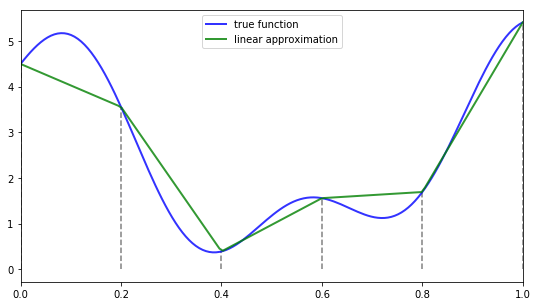

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def f(x):
    y1 = 2 * np.cos(6 * x) + np.sin(14 * x)
    return y1 + 2.5

c_grid = np.linspace(0, 1, 6)


def Af(x):
    return sp.interp(x, c_grid, f(c_grid))

f_grid = np.linspace(0, 1, 150)

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_xlim(0, 1)

ax.plot(f_grid, f(f_grid), 'b-', lw=2, alpha=0.8, label='true function')
ax.plot(f_grid, Af(f_grid), 'g-', lw=2, alpha=0.8,
        label='linear approximation')

ax.vlines(c_grid, c_grid * 0, f(c_grid), linestyle='dashed', alpha=0.5)
ax.legend(loc='upper center')
plt.show()

Another advantage of piecewise linear interpolation is that it preserves useful shape properties such as monotonicity and concavity / convexity

### The Bellman Operator

Here's a function that implements the Bellman operator using linear interpolation

In [2]:
"""
Filename: optgrowth.py
Authors: John Stachurski, Thomas Sargent

Solving the optimal growth problem via value function iteration.  The model is
described in 

    http://quant-econ.net/py/optgrowth.html
"""

import numpy as np
from scipy.optimize import fminbound


def bellman_operator(w, grid, beta, u, f, shocks, Tw=None, compute_policy=0):
    """
    The approximate Bellman operator, which computes and returns the
    updated value function Tw on the grid points.  An array to store
    the new set of values Tw is optionally supplied (to avoid having to
    allocate new arrays at each iteration).  If supplied, any existing data in 
    Tw will be overwritten.

    Parameters
    ----------
    w : array_like(float, ndim=1)
        The value of the input function on different grid points
    grid : array_like(float, ndim=1)
        The set of grid points
    beta : scalar
        The discount factor
    u : function
        The utility function
    f : function
        The production function
    shocks : numpy array
        An array of draws from the shock, for Monte Carlo integration (to
        compute expectations).
    Tw : array_like(float, ndim=1) optional (default=None)
        Array to write output values to
    compute_policy : Boolean, optional (default=False)
        Whether or not to compute policy function

    """
    # === Apply linear interpolation to w === #
    w_func = lambda x: np.interp(x, grid, w)

    # == Initialize Tw if necessary == # 
    if Tw is None:
        Tw = np.empty_like(w)

    if compute_policy:
        sigma = np.empty_like(w)

    # == set Tw[i] = max_c { u(c) + beta E w(f(y  - c) z)} == #
    for i, y in enumerate(grid):
        def objective(c):
            return - u(c) - beta * np.mean(w_func(f(y - c) * shocks))
        c_star = fminbound(objective, 1e-10, y)
        if compute_policy:
            sigma[i] = c_star
        Tw[i] = - objective(c_star)

    if compute_policy:
        return Tw, sigma
    else:
        return Tw



The arguments to `bellman_operator` are described in the docstring to the function

Notice that the expectation in $(\star)$ is computed via Monte Carlo, using the approximation

$$
\int w(f(y - c) z) \phi(dz) \approx \frac{1}{n} \sum_{i=1}^n w(f(y - c) \xi_i)
$$

where $ \{\xi_i\}_{i=1}^n $ are IID draws from $ \phi $

Monte Carlo is not always the most efficient way to compute integrals numerically but it does have some theoretical advantages in the present setting

(For example, it preserves the contraction mapping property of the Bellman operator - see, e.g., [PalS13](https://lectures.quantecon.org/py/zreferences.html#pal2013))




### An Example

Let's test out our operator when

- $ f(k) = k^{\alpha} $  
- $ u(c) = \ln c $  
- $ \phi $ is the distribution of $ \exp(\mu + \sigma \zeta) $ when $ \zeta $ is standard normal  


As is well-known (see [LS12](https://lectures.quantecon.org/py/zreferences.html#ljungqvist2012), section 3.1.2), for this particular problem an exact analytical solution is available, with


$$
v^*(y) =
\frac{\ln (1 - \alpha \beta) }{ 1 - \beta}
+
\frac{(\mu + \alpha \ln (\alpha \beta))}{1 - \alpha}
 \left[
     \frac{1}{1- \beta} - \frac{1}{1 - \alpha \beta}
 \right]
 +
 \frac{1}{1 - \alpha \beta} \ln y
$$

The optimal consumption policy is

$$
\sigma^*(y) = (1 - \alpha \beta ) y
$$

Let's wrap this model in a class because we'll use it some later lectures too

In [3]:
class LogLinearOG:
    """
    Log linear optimal growth model, with log utility, CD production and
    multiplicative lognormal shock, so that

        y = f(k, z) = z k^alpha

    with z ~ LN(mu, s).

    The class holds parameters and true value and policy functions.
    """

    def __init__(self, alpha=0.4, beta=0.96, mu=0, s=0.1):

        self.alpha, self.beta, self.mu, self.s = alpha, beta, mu, s 

        # == Some useful constants == #
        self.ab = alpha * beta
        self.c1 = np.log(1 - self.ab) / (1 - beta)
        self.c2 = (mu + alpha * np.log(self.ab)) / (1 - alpha)
        self.c3 = 1 / (1 - beta)
        self.c4 = 1 / (1 - self.ab)

    def u(self, c):
        " Utility "
        return np.log(c)

    def u_prime(self, c):
        return 1 / c

    def f(self, k):
        " Deterministic part of production function.  "
        return k**self.alpha

    def f_prime(self, k):
        return self.alpha * k**(self.alpha - 1)

    def c_star(self, y):
        " True optimal policy.  "
        return (1 - self.alpha * self.beta) * y

    def v_star(self, y):
        " True value function. "
        return self.c1 + self.c2 * (self.c3 - self.c4) + self.c4 * np.log(y)

### A First Test

To test our code, we want to see if we can replicate this solution numerically, using fitted value function iteration

First, having run the code for the log linear model shown above, let's
generate an instance

In [4]:
lg = LogLinearOG()
# == Unpack parameters / functions for convenience
alpha, beta, mu, s = lg.alpha, lg.beta, lg.mu, lg.s
v_star = lg.v_star

We need a grid and some shock draws for Monte Carlo integration

In [5]:
grid_max = 4         # Largest grid point
grid_size = 200      # Number of grid points
shock_size = 250     # Number of shock draws in Monte Carlo integral

grid = np.linspace(1e-5, grid_max, grid_size)
shocks = np.exp(mu + s * np.random.randn(shock_size))

Now let's do some tests

In the code shown below and all other code, we assume that you've already run
the code above, as well as

In [6]:
import matplotlib.pyplot as plt

As one preliminary test, let's see what happens when we apply our Bellman operator to the exact solution $ v^* $

In theory, the resulting function should again be $ v^* $

In practice we expect some small numerical error

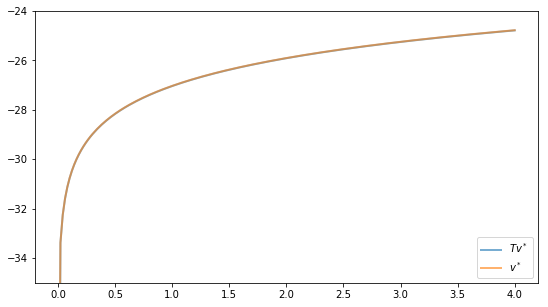

In [7]:
w = bellman_operator(v_star(grid),
                     grid,
                     beta,
                     np.log,
                     lambda k: k**alpha,
                     shocks)


fig, ax = plt.subplots(figsize=(9, 5))
ax.set_ylim(-35, -24)
ax.plot(grid, w, lw=2, alpha=0.6, label=r'$Tv^*$')
ax.plot(grid, v_star(grid), lw=2, alpha=0.6, label='$v^*$')
ax.legend(loc='lower right')
plt.show()

The two functions are essentially indistinguishable, so we are off to a good start

Now let's have a look at iterating with the Bellman operator, starting off
from an arbitrary initial condition

The initial condition we'll start with is $ w(y) = 5 \ln (y) $

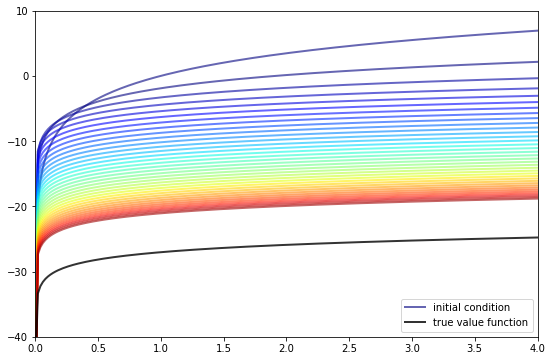

In [8]:
w = 5 * np.log(grid)  # An initial condition
n = 35
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_ylim(-40, 10)
ax.set_xlim(np.min(grid), np.max(grid))
lb = 'initial condition'
ax.plot(grid, w, color=plt.cm.jet(0), lw=2, alpha=0.6, label=lb)
for i in range(n):
    w = bellman_operator(w,
                         grid,
                         beta,
                         np.log,
                         lambda k: k**alpha,
                         shocks)

    ax.plot(grid, w, color=plt.cm.jet(i / n), lw=2, alpha=0.6)

lb = 'true value function'
ax.plot(grid, v_star(grid), 'k-', lw=2, alpha=0.8, label=lb)
ax.legend(loc='lower right')

plt.show()

The figure shows

1. the first 36 functions generated by the fitted value function iteration algorithm, with hotter colors given to higher iterates  
1. the true value function $ v^* $ drawn in black  


The sequence of iterates converges towards $ v^* $

We are clearly getting closer

Let's try a more serious attempt to converge to $ v^* $, using [QuantEcon.py](https://quantecon.org/quantecon-py)'s
`compute_fixed_point` function

In [20]:
from quantecon import compute_fixed_point

Tw = np.empty(len(grid))
initial_w = 5 * np.log(grid)

v_star_approx = compute_fixed_point(bellman_operator,
                                    initial_w,
                                    1e-4,  # error_tol
                                    500,   # max_iter
                                    2,     # verbose
                                    10,     # print_skip
                                    'iteration',
                                    grid,
                                    beta,
                                    np.log,
                                    lambda k: k**alpha,
                                    shocks,
                                    Tw=Tw,
                                    compute_policy=False)

Iteration    Distance       Elapsed (seconds)
---------------------------------------------
10           8.992e-01      7.739e-01         
20           7.340e-01      1.534e+00         
30           5.997e-01      2.295e+00         
40           4.900e-01      3.055e+00         
50           4.004e-01      3.816e+00         
60           3.271e-01      4.577e+00         
70           2.673e-01      5.335e+00         
80           2.184e-01      6.098e+00         
90           1.785e-01      6.863e+00         
100          1.458e-01      7.624e+00         
110          1.191e-01      8.383e+00         
120          9.734e-02      9.148e+00         
130          7.954e-02      9.913e+00         
140          6.499e-02      1.068e+01         
150          5.310e-02      1.144e+01         
160          4.339e-02      1.220e+01         
170          3.545e-02      1.298e+01         
180          2.896e-02      1.374e+01         
190          2.367e-02      1.451e+01         
200          1.

Let's have a look at the result

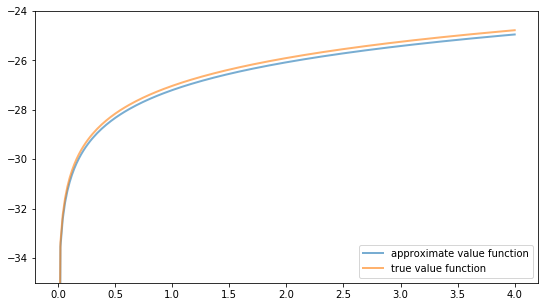

In [11]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.set_ylim(-35, -24)
ax.plot(grid, v_star_approx, lw=2, alpha=0.6, label='approximate value function')
ax.plot(grid, v_star(grid), lw=2, alpha=0.6, label='true value function')
ax.legend(loc='lower right')
plt.show()

The figure shows that we are pretty much on the money

### The Policy Function


<a id='index-8'></a>
To compute an approximate optimal policy, we take the approximate value
function we just calculated and then compute the corresponding greedy policy

The next figure compares the result to the exact solution, which, as mentioned
above, is $ \sigma(y) = (1 - \alpha \beta) y $

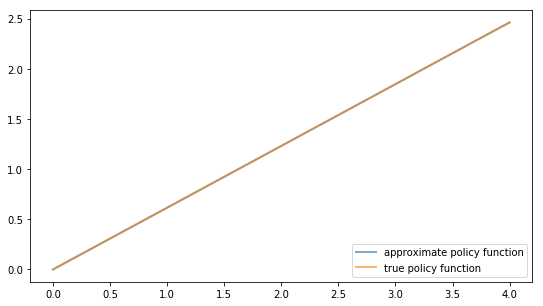

In [12]:
Tw, sigma = bellman_operator(v_star_approx,
                            grid,
                            beta,
                            np.log,
                            lambda k: k**alpha,
                            shocks,
                            compute_policy=True)


fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(grid, sigma, lw=2, alpha=0.6, label='approximate policy function')
cstar = (1 - alpha * beta) * grid
ax.plot(grid, cstar, lw=2, alpha=0.6, label='true policy function')
ax.legend(loc='lower right')
plt.show()

The figure shows that we've done a good job in this instance of approximating
the true policy

## Exercises

### Exercise 1

Once an optimal consumption policy $ \sigma $ is given, the dynamics for the capital stock follows

$$
y_{t+1} = f(y_t - \sigma(y_t)) \xi_{t+1},
\quad y_0 \text{ given}
$$

The next figure shows a simulation of 100 elements of this sequence for three different discount factors (and hence three different policies)

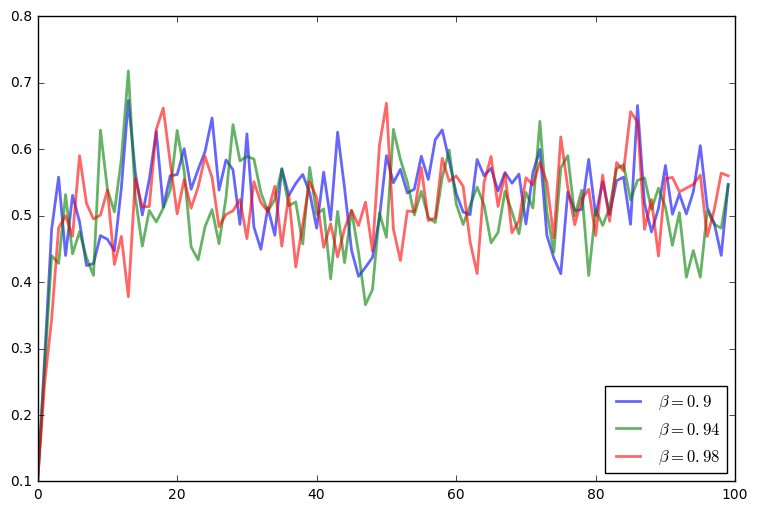

In [13]:
from IPython.display import Image
Image("solution_og_ex2.png", width=500)


In each sequence, the initial condition is $ y_0 = 0.1 $

The discount factors are discount_factors = (0.9, 0.94, 0.98)

Otherwise, the parameters and primitives are the same as the log linear model discussed earlier in the lecture

Replicate the figure modulo randomness

## Solutions

### Solution to Exercise 1

Here's our solution, which assumes you've executed the code in the lecture

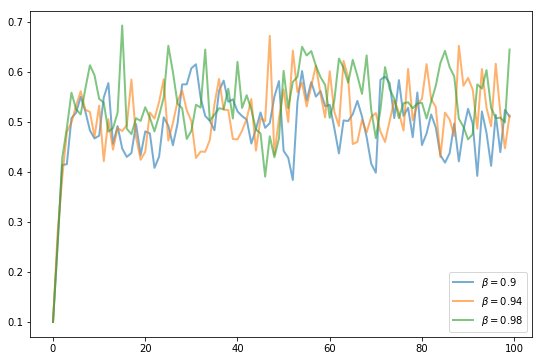

In [14]:
def simulate_og(sigma, y0 = 0.1, ts_length=100):
    '''
    Compute a time series given consumption policy sigma.
    '''
    y = np.empty(ts_length)
    xi = np.random.randn(ts_length)
    y[0] = y0
    for t in range(ts_length-1):
        y[t+1] = (y[t] - sigma(y[t]))**alpha * np.exp(mu + s * xi[t+1])
    return y

fig, ax = plt.subplots(figsize=(9, 6))

for beta in (0.9, 0.94, 0.98):

    Tw = np.empty(len(grid))
    initial_w = 5 * np.log(grid)

    v_star_approx = compute_fixed_point(bellman_operator,
                                        initial_w,
                                        1e-5,  # error_tol
                                        500,   # max_iter
                                        False,  # verbose
                                        5,     # print_skip
                                        'iteration',
                                        grid,
                                        beta,
                                        np.log,
                                        lambda k: k**alpha,
                                        shocks,
                                        Tw=Tw,
                                        compute_policy=False)

    Tw, sigma = bellman_operator(v_star_approx,
                            grid,
                            beta,
                            np.log,
                            lambda k: k**alpha,
                            shocks,
                            compute_policy=True)

    sigma_func = lambda x: np.interp(x, grid, sigma)
    y = simulate_og(sigma_func)
    ax.plot(y, lw=2, alpha=0.6, label=r'$\beta = {}$'.format(beta))


ax.legend(loc='lower right')
plt.show()